In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class k_arm_bandit:
    def __init__(self,k,eps):
        self.reward=list(np.random.randn(k)) #赌博机的平均收益值
        self.right_oper=np.argmax(self.reward)
        self.steps=0
        self.k=k
        
        self.average_reward=[0]*k #当前轮次的每个动作的平均收益
        self.oper_nums=[0]*k #当前轮次每个动作的操作次数
        self.eps=eps        
        
        self.all_average_reward=[] #当前轮次的平均收益
        self.all_reward=0
        self.right_operations=[] #当前轮次正确操作的概率
        self.right_operations_number=0
    
    def get_action(self,num):
        x=random.random()
        if x<self.eps[num]:
            return random.randint(0,self.k-1)
        else:
            max_operation=[]
            max_value=max(self.average_reward)
            for i in range(len(self.average_reward)):
                if self.average_reward[i]==max_value:
                    max_operation.append(i)
            return random.choice(max_operation)
        
    def get_reward(self,oper_id):
        return self.reward[oper_id]+np.random.standard_normal()
    
    def update(self):
        
        A=self.get_action(self.steps//5000)
        R=self.get_reward(A)
        
        self.oper_nums[A]+=1
        self.average_reward[A]=self.average_reward[A]+1.0/self.oper_nums[A]*(R-self.average_reward[A])
        
        self.steps+=1
        self.all_reward+=R
        if A==self.right_oper:
            self.right_operations_number+=1
        self.all_average_reward.append(self.all_reward/self.steps)
        self.right_operations.append(self.right_operations_number/self.steps)

In [10]:
class epsilon_greedy_2:
    def __init__(self,eps):
        self.all_reward=[0]*5000
        self.all_right_oper=[0]*5000
        self.iter_num=2000
        self.eps=eps
        
    def wk(self):
        for iteration in range(self.iter_num):
            bandit=k_arm_bandit(10,self.eps)
            for steps in range(5000):
                bandit.update()
            for i in range(5000):
                self.all_reward[i]+=bandit.all_average_reward[i]/self.iter_num
                self.all_right_oper[i]+=bandit.right_operations[i]/self.iter_num

In [20]:
bandit=epsilon_greedy_2([0.25,0.2,0.1,0.05,0.01])
bandit.wk()

In [21]:
x=[]
for i in range(1,5001):
    x.append(i)

Text(0.5, 1.0, 'average reward')

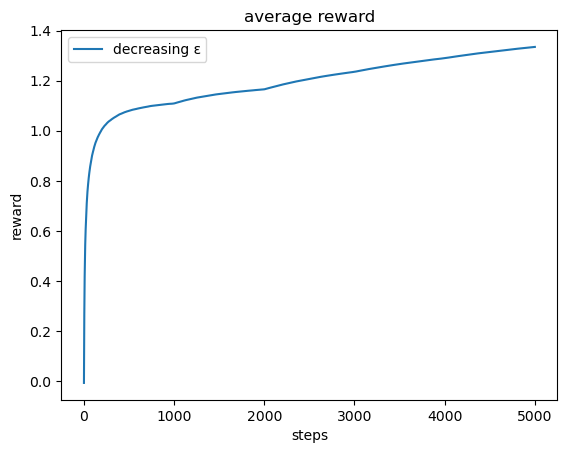

In [22]:
plt.plot(x,bandit.all_reward,label='decreasing ε')
plt.ylabel("reward")
plt.xlabel("steps")
plt.legend()
plt.title("average reward")

Text(0.5, 1.0, '% of best operations')

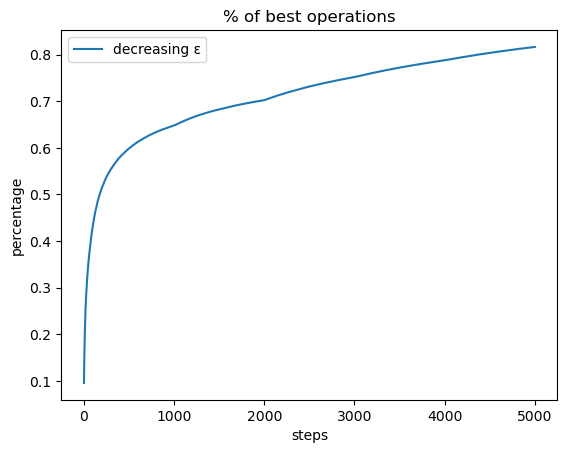

In [23]:
plt.plot(x,bandit.all_right_oper,label='decreasing ε')
plt.ylabel("percentage")
plt.xlabel("steps")
plt.legend()
plt.title("% of best operations")